### 필요한 설치파일

In [1]:
# pip install matplotlib pandas scikit-learn scipy joblib

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로드

In [48]:
df = pd.DataFrame({'hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'score': [60, 63, 64, 67, 68, 71, 72, 75, 76, 78]})

### 데이터 시각화

In [49]:
df

,hours,score
0,1,60
1,2,63
2,3,64
3,4,67
4,5,68
5,6,71
6,7,72
7,8,75
8,9,76
9,10,78


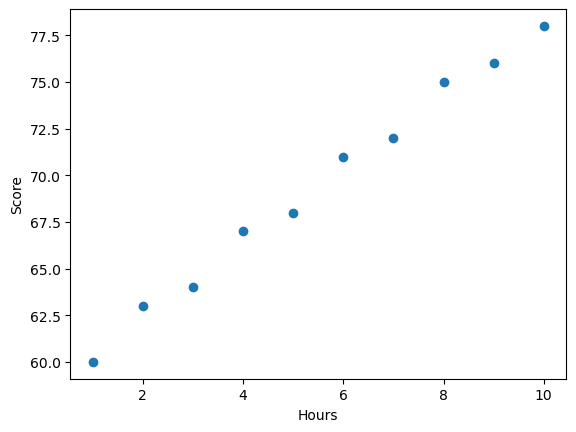

In [50]:
plt.scatter(df.hours, df.score)  # 점도표
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### 데이터 분할

In [51]:
# 학습 데이터 X와 라벨데이터 y 로 데이터 분할
X = df[['hours']]
y = df[['score']]

In [52]:
# 팬더스 데이터를 numpy 포맷으로 변환
X = X.to_numpy()
y = y.to_numpy()

### 선형회귀 또는 다른 회귀 모델 생성

In [56]:
# 선형회기 머신러닝 기법 적용
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()     # scikit learn LinearRegression 개체 생성
regressor.fit(X, y)    # fit 메서드를 사용해 모델 트레이닝 실행

LinearRegression()

In [54]:
# 테스트 데이터 생성
test_df = pd.DataFrame({'hours': [14]})  # 학습 데이터에 없던 값
test_df

,hours
0,14


In [55]:
X_test = test_df.to_numpy ()
y_pred = regressor.predict(X_test)
y_pred

array([78])

In [39]:
# 정확도 체크
from sklearn.model_selection import train_test_split

# 데이터를 트레이닝 데이터셋과 테스트 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,    # 7:3의 비율로 분리
                                                    random_state=42
                                                   )


In [40]:
X_train
# 7건의 트레이닝 데이터

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [41]:
X_test
# 3건의 테스트 데이터

array([[9],
       [2],
       [6]])

In [43]:
regressor = LinearRegression()     # scikit learn LinearRegression 개체 생성
regressor.fit(X_train, y_train)    # fit 메서드를 사용해 모델 트레이닝 실행

y_pred = regressor.predict(X_test)

/Users/seongmyeong-gi/anaconda3/envs/OSS-Challenge/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
y_pred

array([78, 60, 72])

### 모델 정확도 평가 & MSE, MAE 사용

In [45]:
# https://www.sqler.com/board_MachineLearning_AI_tip_lecture/1096470
from sklearn import metrics

# MSE - 에러율
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4.666666666666667


In [46]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  2.0


### 모델 저장

In [18]:
import joblib

In [19]:
# 모델 저장
# joblib.dump(regressor, 'model.pkl')

['model2model2.pkl']

In [20]:
# 모델을 로드하고 예측 실행
loaded_model = joblib.load('./data/weights/model.pkl')

In [22]:
X_test = pd.DataFrame({'hours': [20]}).to_numpy ()  # 14를 df에서 np로 변환하고 predict 수행
y_pred = loaded_model.predict(X_test)
y_pred

array([[108.67326733]])